## Imported Necessary Libraries


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Healthcare_Fraud.csv')

In [3]:
df.head(5)

,Provider_ID,Patient_ID,Diagnosis_Code,Procedure_Code,Admission_Date,Discharge_Date,Claim_Amount,Paid_Amount,Provider_Specialty,Patient_Age,Patient_Gender,Fraud_Label,Investigation_Details,Coverage_Amount,Total_Charges,Payment_Type,State,Nationality,Employer,Occupation
0,Asian Medical Center,Darrell Blair,DX_714,PROC_2648,3/26/2024,5/8/2024,1077.86,4362.78,Orthopedics,76.0,Female,1.0,Cleared,3880.49,9913.47,Credit Card,Bangkok,Korean,Mitchell-Mcintosh,Teacher
1,Sky Hospital,William Young,DX_885,PROC_9084,4/7/2024,5/3/2024,4998.88,5867.30,Cardiology,73.0,Female,1.0,Under investigation,1541.03,7723.89,Credit Card,Mumbai,Korean,"Galloway, Castillo and Smith",Businessman
2,Moon Healthcare,Keith Reynolds,DX_988,PROC_9747,4/1/2024,5/24/2024,7058.21,8526.15,Orthopedics,34.0,Male,0.0,Cleared,2047.66,9671.58,Credit Card,Seoul,Indian,"Phillips, Bryant and Murphy",Teacher
3,Sky Hospital,Andre Kelly,DX_779,PROC_4334,3/31/2024,4/27/2024,1628.67,8317.18,Cardiology,58.0,Male,0.0,Suspicious,3198.92,7887.55,Check,Tokyo,Thai,"Lee, Jackson and Hoffman",Doctor
4,Sun Clinic,Terry Gonzales,DX_644,PROC_8408,3/27/2024,5/12/2024,1480.43,4136.33,Orthopedics,90.0,Female,0.0,Under investigation,2935.93,332.80,Electronic Funds Transfer,Mumbai,Thai,"Peterson, Lopez and Blake",Engineer


## Cleaning Data



In [4]:
# Assuming your DataFrame is named 'df'
df.drop(columns=['Diagnosis_Code', 'Procedure_Code'], inplace=True)

In [5]:
# Assuming your DataFrame is named 'df'
df.rename(columns={'State': 'Country'}, inplace=True)

In [6]:
df.head(5)

,Provider_ID,Patient_ID,Admission_Date,Discharge_Date,Claim_Amount,Paid_Amount,Provider_Specialty,Patient_Age,Patient_Gender,Fraud_Label,Investigation_Details,Coverage_Amount,Total_Charges,Payment_Type,Country,Nationality,Employer,Occupation
0,Asian Medical Center,Darrell Blair,3/26/2024,5/8/2024,1077.86,4362.78,Orthopedics,76.0,Female,1.0,Cleared,3880.49,9913.47,Credit Card,Bangkok,Korean,Mitchell-Mcintosh,Teacher
1,Sky Hospital,William Young,4/7/2024,5/3/2024,4998.88,5867.30,Cardiology,73.0,Female,1.0,Under investigation,1541.03,7723.89,Credit Card,Mumbai,Korean,"Galloway, Castillo and Smith",Businessman
2,Moon Healthcare,Keith Reynolds,4/1/2024,5/24/2024,7058.21,8526.15,Orthopedics,34.0,Male,0.0,Cleared,2047.66,9671.58,Credit Card,Seoul,Indian,"Phillips, Bryant and Murphy",Teacher
3,Sky Hospital,Andre Kelly,3/31/2024,4/27/2024,1628.67,8317.18,Cardiology,58.0,Male,0.0,Suspicious,3198.92,7887.55,Check,Tokyo,Thai,"Lee, Jackson and Hoffman",Doctor
4,Sun Clinic,Terry Gonzales,3/27/2024,5/12/2024,1480.43,4136.33,Orthopedics,90.0,Female,0.0,Under investigation,2935.93,332.80,Electronic Funds Transfer,Mumbai,Thai,"Peterson, Lopez and Blake",Engineer


In [7]:
# Feature engineering (add more as needed)
df['Length_of_Stay'] = (pd.to_datetime(df['Discharge_Date']) - pd.to_datetime(df['Admission_Date'])).dt.days
df['Paid_Claim_Ratio'] = df['Paid_Amount'] / df['Claim_Amount']

## Training and Testing Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
# Select relevant features
features = ['Patient_Age', 'Length_of_Stay', 'Paid_Claim_Ratio', 'Coverage_Amount', 'Total_Charges']
X = df[features]
y = df['Fraud_Label']

In [11]:
# Impute missing values for X
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

In [12]:
# Impute missing values for y
imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1))

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

## Recommendation Models


In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Now fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.54, 0.46],
       [0.45, 0.55],
       [0.55, 0.45],
       ...,
       [0.34, 0.66],
       [0.52, 0.48],
       [0.47, 0.53]])

In [19]:
# The predict_proba method returns probabilities for both classes
# We're usually interested in the probability of the positive class (fraud)
# Assuming the positive class (fraud) is labeled as 1 and is the second column
fraud_probabilities = y_pred_proba[:, 1]
fraud_probabilities

array([0.46, 0.55, 0.45, ..., 0.66, 0.48, 0.53])

In [21]:
# Convert probabilities to percentages
fraud_percentages = fraud_probabilities * 100
fraud_percentages

array([46., 55., 45., ..., 66., 48., 53.])

In [22]:
# If you want to see the results, you can print a few examples
print("Fraud probabilities (%):")
for i in range(min(10, len(fraud_percentages))):  # Print first 10 or fewer
    print(f"Sample {i+1}: {fraud_percentages[i]:.2f}%")

Fraud probabilities (%):
Sample 1: 46.00%
Sample 2: 55.00%
Sample 3: 45.00%
Sample 4: 41.00%
Sample 5: 61.00%
Sample 6: 75.00%
Sample 7: 54.00%
Sample 8: 53.00%
Sample 9: 40.00%
Sample 10: 64.00%


In [23]:
# If you want to add these predictions to a dataframe
import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_test.ravel(),
    'Predicted_Fraud_Probability_%': fraud_percentages
})

In [24]:
print("\nFirst few rows of the results dataframe:")
print(results_df.head())


First few rows of the results dataframe:
   Actual  Predicted_Fraud_Probability_%
0     0.0                           46.0
1     0.0                           55.0
2     1.0                           45.0
3     1.0                           41.0
4     0.0                           61.0


In [25]:
# If you want to get the average predicted fraud probability
average_fraud_probability = fraud_percentages.mean()
print(f"\nAverage predicted fraud probability: {average_fraud_probability:.2f}%")


Average predicted fraud probability: 50.16%


## Data Visualisation


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Set style for better-looking plots
plt.style.use('seaborn')

# 1. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

<ipython-input-26-bbbbb12c6057>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


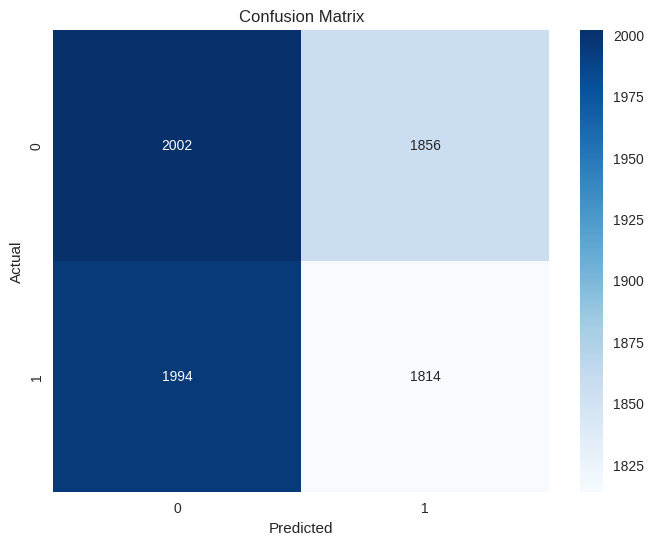

In [27]:
# Get predictions
y_pred = model.predict(X_test_scaled)
plot_confusion_matrix(y_test, y_pred)

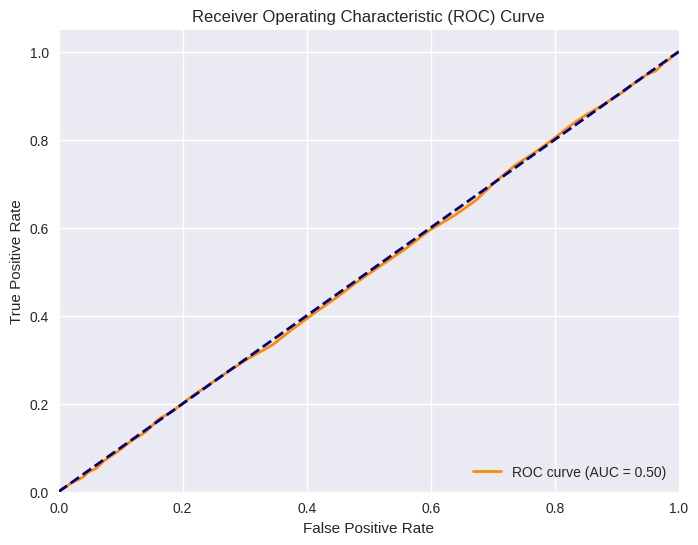

In [28]:
# 2. ROC Curve
def plot_roc_curve(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, fraud_probabilities)


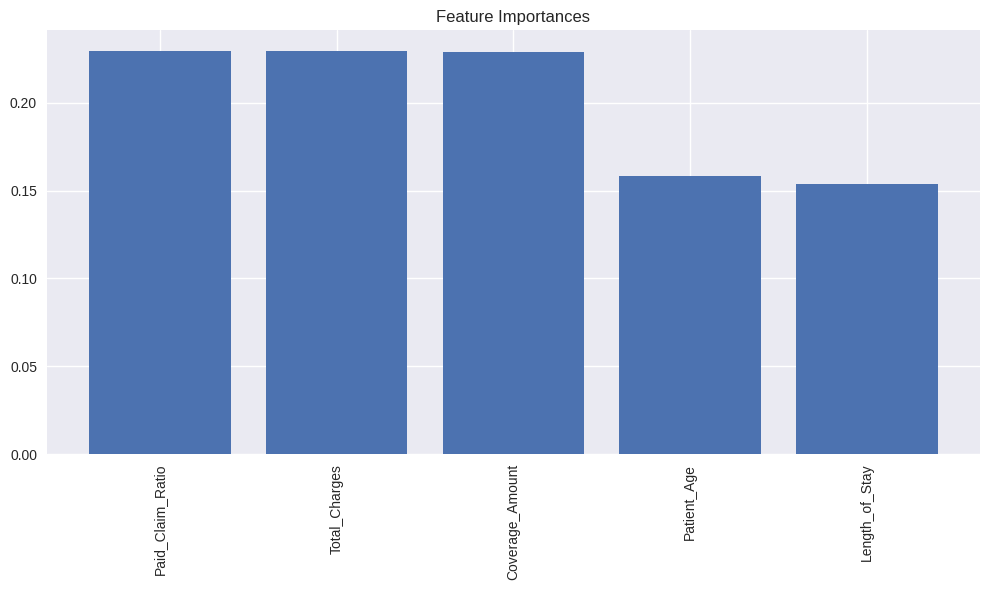

In [29]:
# 3. Feature Importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model, features)

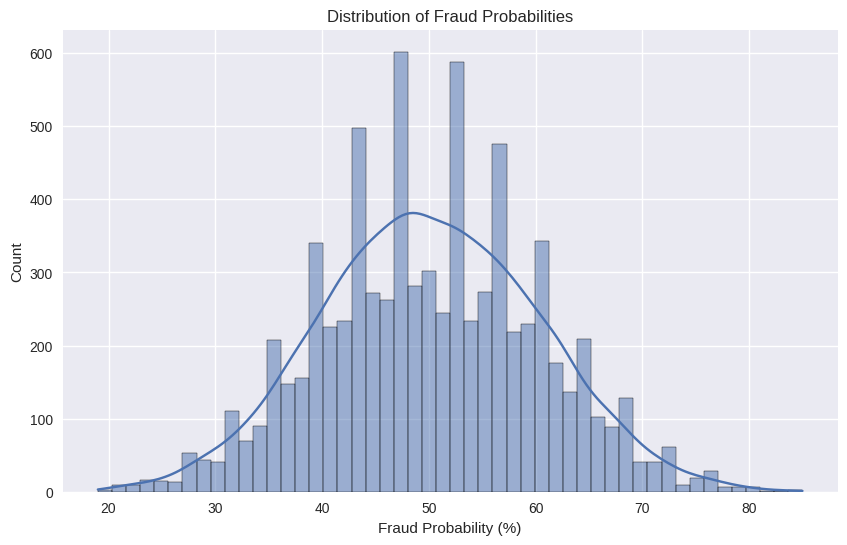

In [30]:
# 4. Distribution of Fraud Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(fraud_percentages, bins=50, kde=True)
plt.title('Distribution of Fraud Probabilities')
plt.xlabel('Fraud Probability (%)')
plt.ylabel('Count')
plt.show()

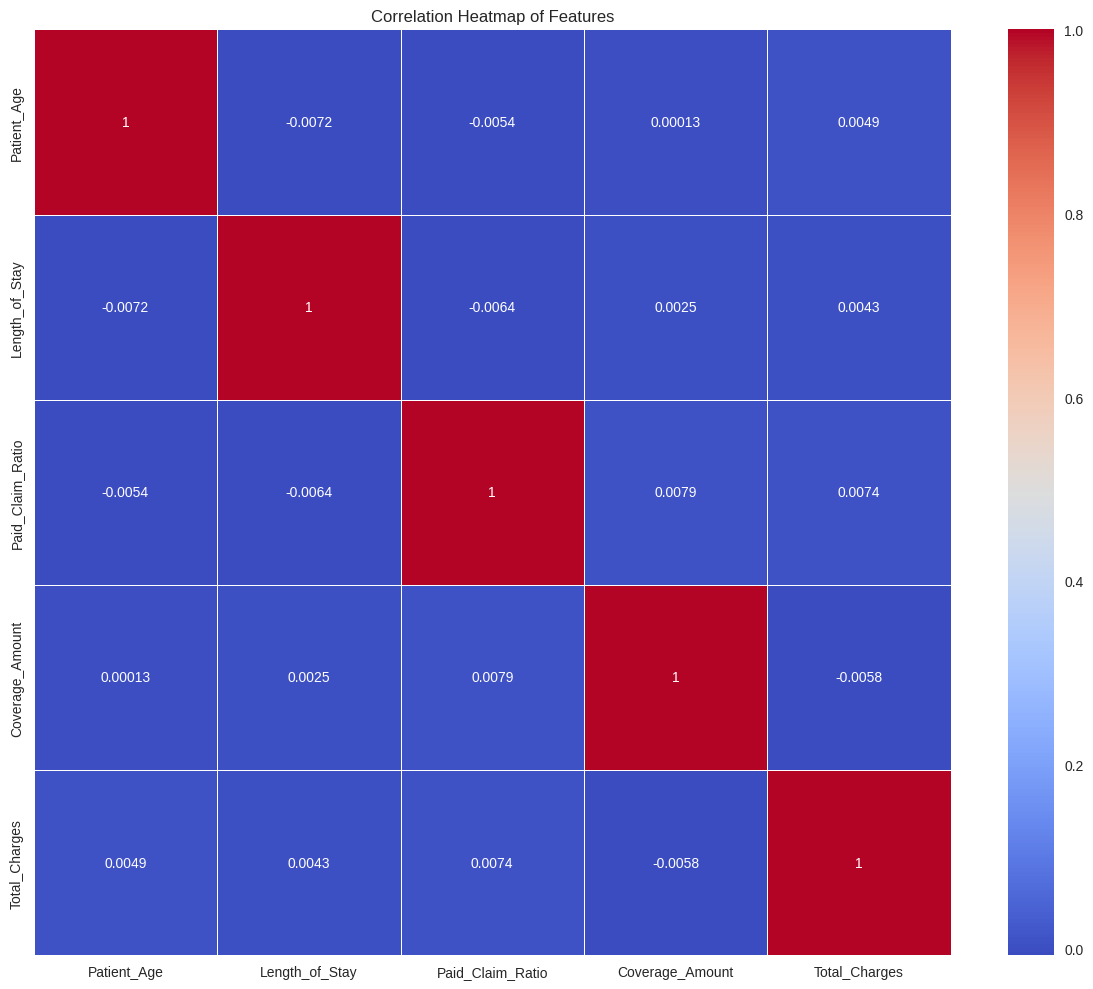

In [31]:
# 5. Correlation Heatmap of Features
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

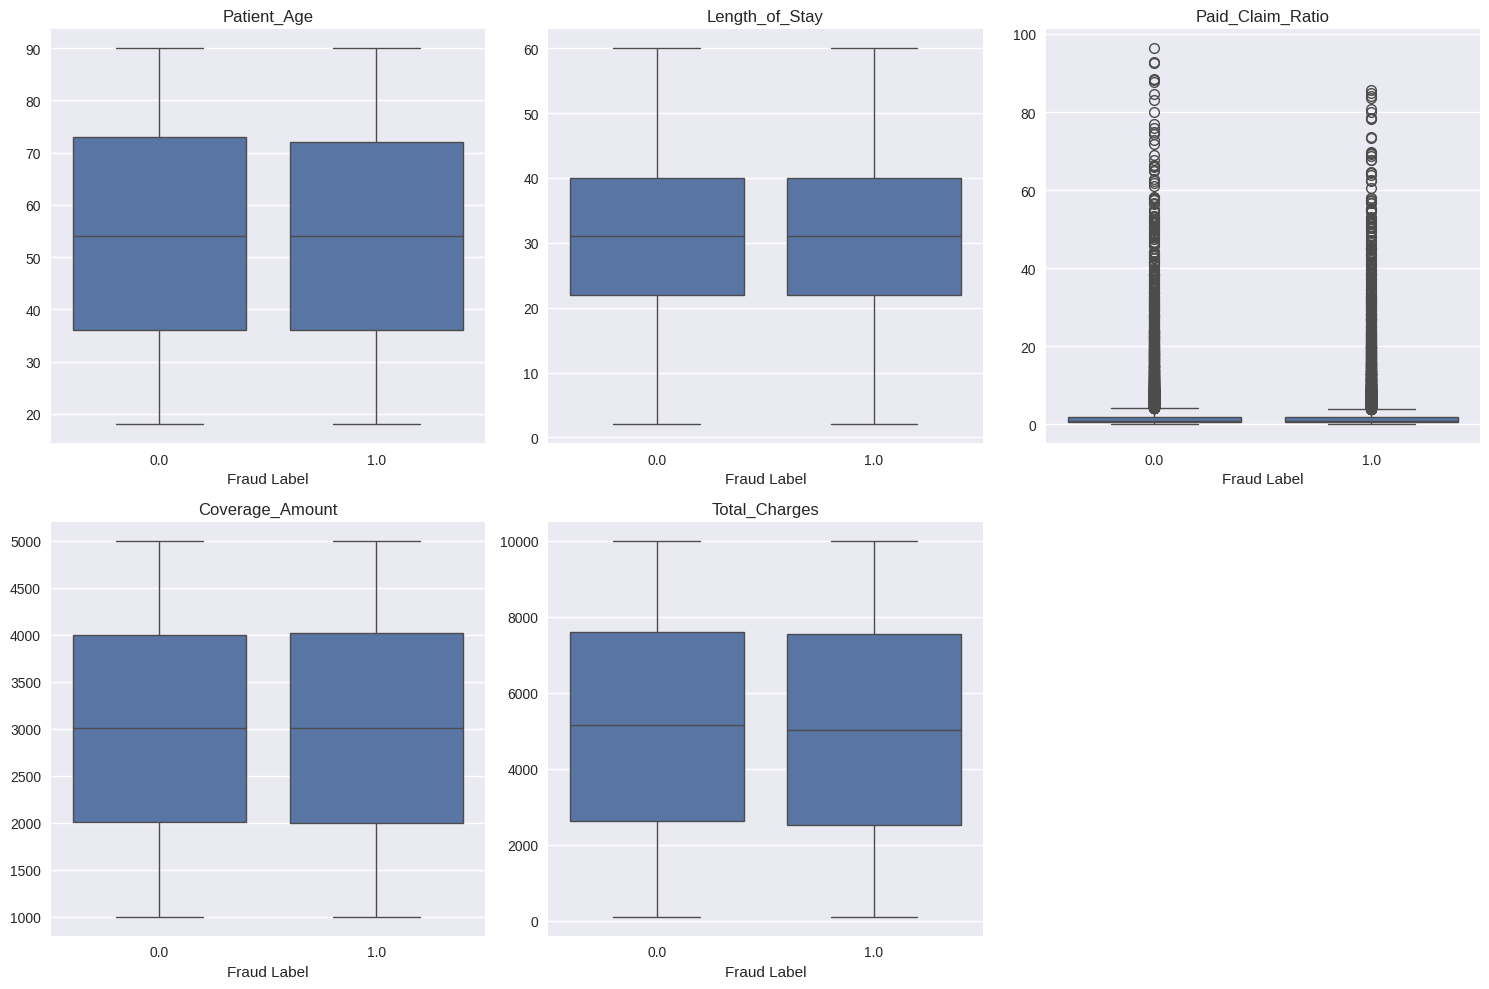

In [32]:
# 6. Box Plot of Features by Fraud Label
def plot_feature_boxplots(X, y, features):
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.boxplot(x=y.ravel(), y=X[:, i], ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xlabel('Fraud Label')

    for j in range(i+1, len(axes)):
        axes[j].remove()

    plt.tight_layout()
    plt.show()

plot_feature_boxplots(X_imputed, y_imputed, features)

In [33]:
# Filter the dataframe to only include fraudulent cases
fraud_df = df[df['Fraud_Label'] == 1].copy()


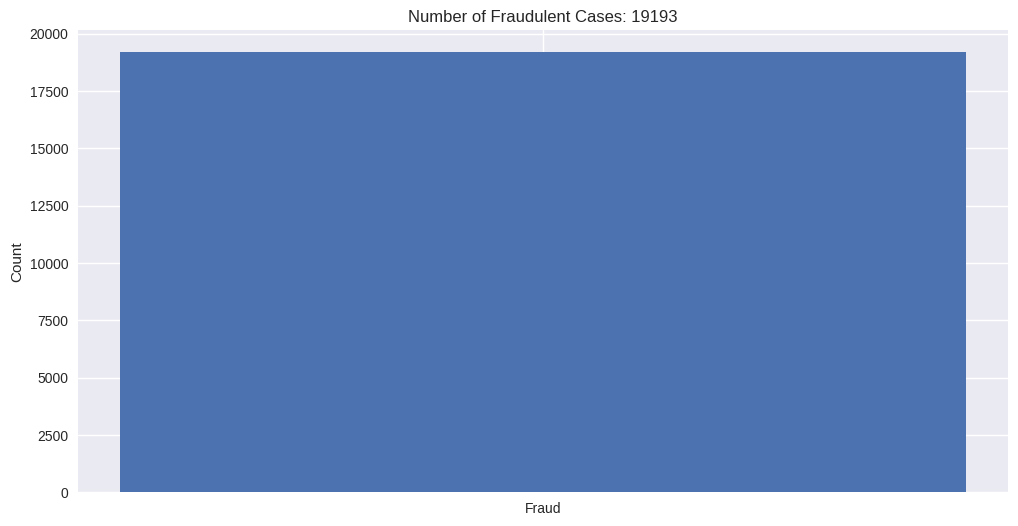

In [34]:
# 1. Bar plot of fraudulent cases
plt.figure(figsize=(12, 6))
fraud_count = len(fraud_df)
plt.bar(['Fraud'], [fraud_count])
plt.title(f'Number of Fraudulent Cases: {fraud_count}')
plt.ylabel('Count')
plt.show()


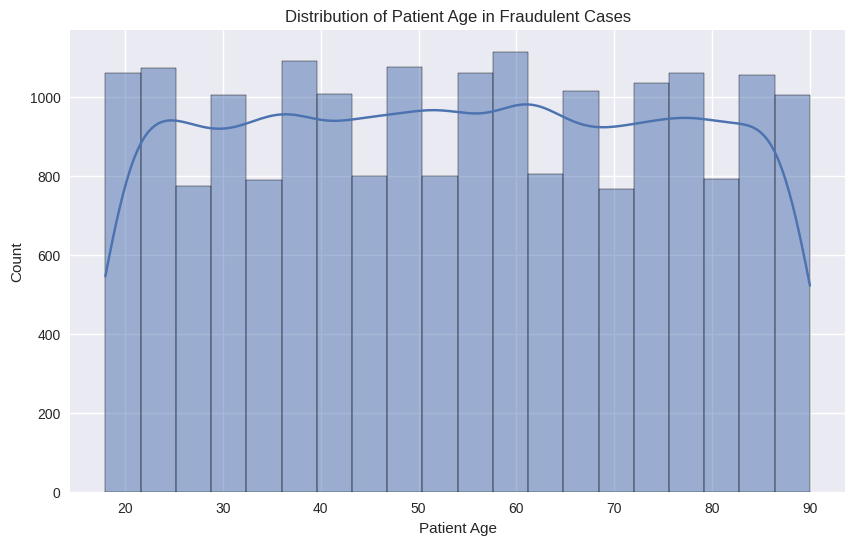

In [37]:
# 4. Histogram of Patient Age for fraudulent cases
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['Patient_Age'], kde=True, bins=20)
plt.title('Distribution of Patient Age in Fraudulent Cases')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

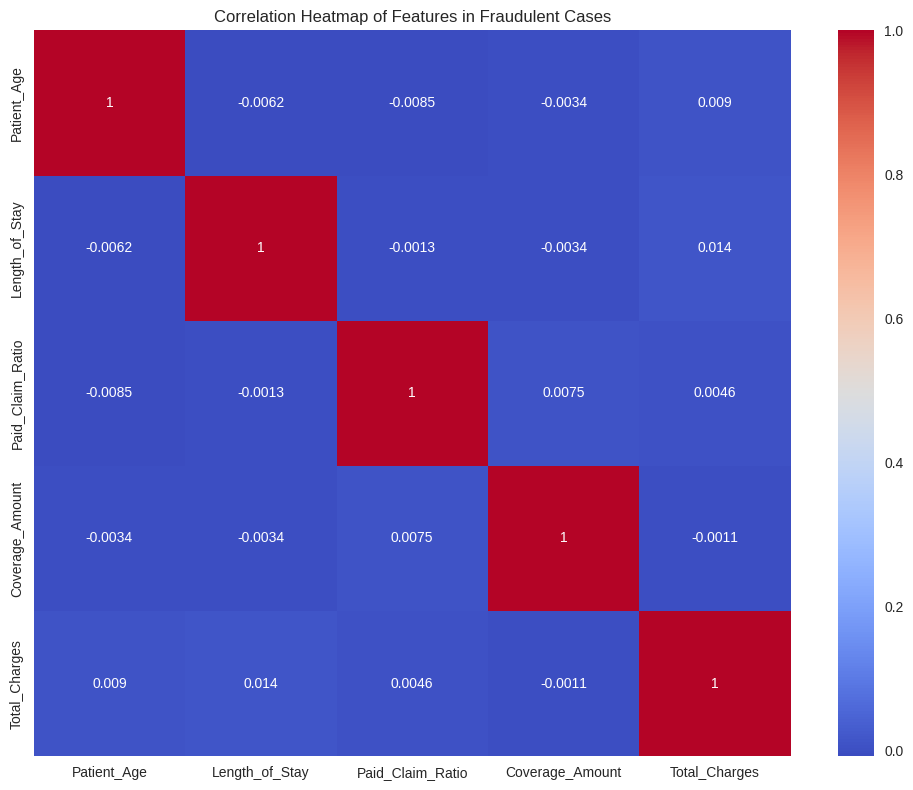

In [38]:
# 6. Heatmap of correlation between features for fraudulent cases
plt.figure(figsize=(10, 8))
correlation_matrix = fraud_df[['Patient_Age', 'Length_of_Stay', 'Paid_Claim_Ratio', 'Coverage_Amount', 'Total_Charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features in Fraudulent Cases')
plt.tight_layout()
plt.show()

In [39]:
# Group by Patient_ID and calculate the count of frauds and total fraudulent amount
fraud_summary = fraud_df.groupby('Patient_ID').agg({
    'Fraud_Label': 'count',
    'Total_Charges': 'sum'
}).reset_index()

In [40]:
# Rename columns for clarity
fraud_summary.columns = ['Patient_ID', 'Fraud_Count', 'Total_Fraud_Amount']

In [42]:
# Sort by Total_Fraud_Amount in descending order
fraud_summary = fraud_summary.sort_values('Total_Fraud_Amount', ascending=False)

In [81]:
# Display only the top 10
print("Summary of Top 10 Frauds by Patient ID:")
print(fraud_summary.head(10).to_string(index=False))

Summary of Top 10 Frauds by Patient ID:
      Patient_ID  Fraud_Count  Total_Fraud_Amount
 Elizabeth Smith           10            59799.51
 Michael Johnson            9            42927.34
      Mark Smith            7            42258.53
   Rebecca Smith            5            41671.76
Michael Williams            6            40510.68
   Michael Smith           10            40029.11
     Aaron Smith            6            39920.99
    James Taylor            6            38643.58
   Melissa Jones            4            33282.58
    Robert Jones            7            33076.16


In [44]:
# Calculate and display overall statistics
total_frauds = fraud_summary['Fraud_Count'].sum()
total_fraud_amount = fraud_summary['Total_Fraud_Amount'].sum()
print(f"\nTotal number of frauds: {total_frauds}")
print(f"Total fraud amount: ${total_fraud_amount:,.2f}")



Total number of frauds: 19193
Total fraud amount: $96,487,454.02


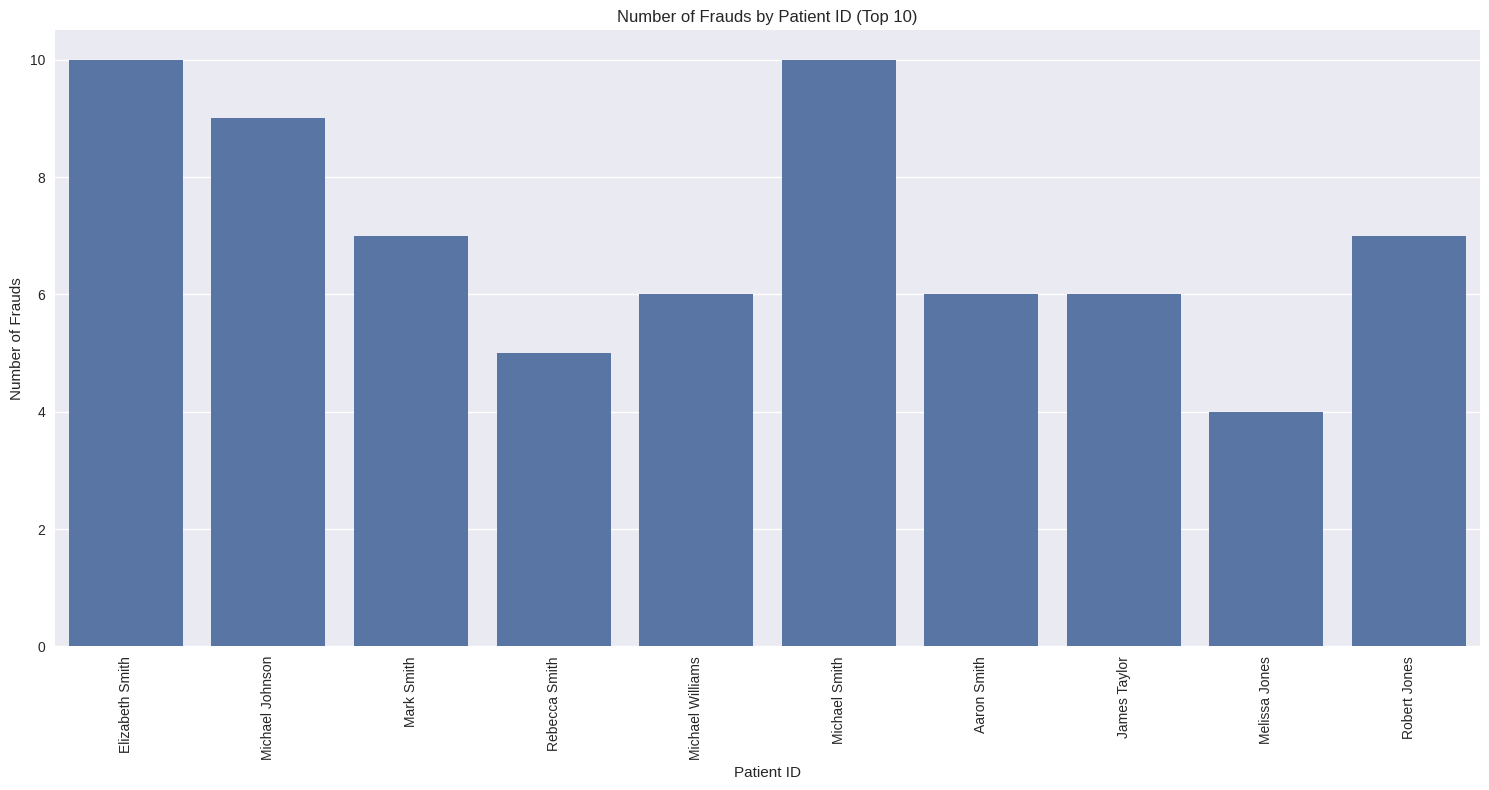

In [78]:
# Visualizations

# 1. Bar plot of Fraud Count by Patient ID (top 10)
plt.figure(figsize=(15, 8))
sns.barplot(x='Patient_ID', y='Fraud_Count', data=fraud_summary.head(10))
plt.title('Number of Frauds by Patient ID (Top 10)')
plt.xlabel('Patient ID')
plt.ylabel('Number of Frauds')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


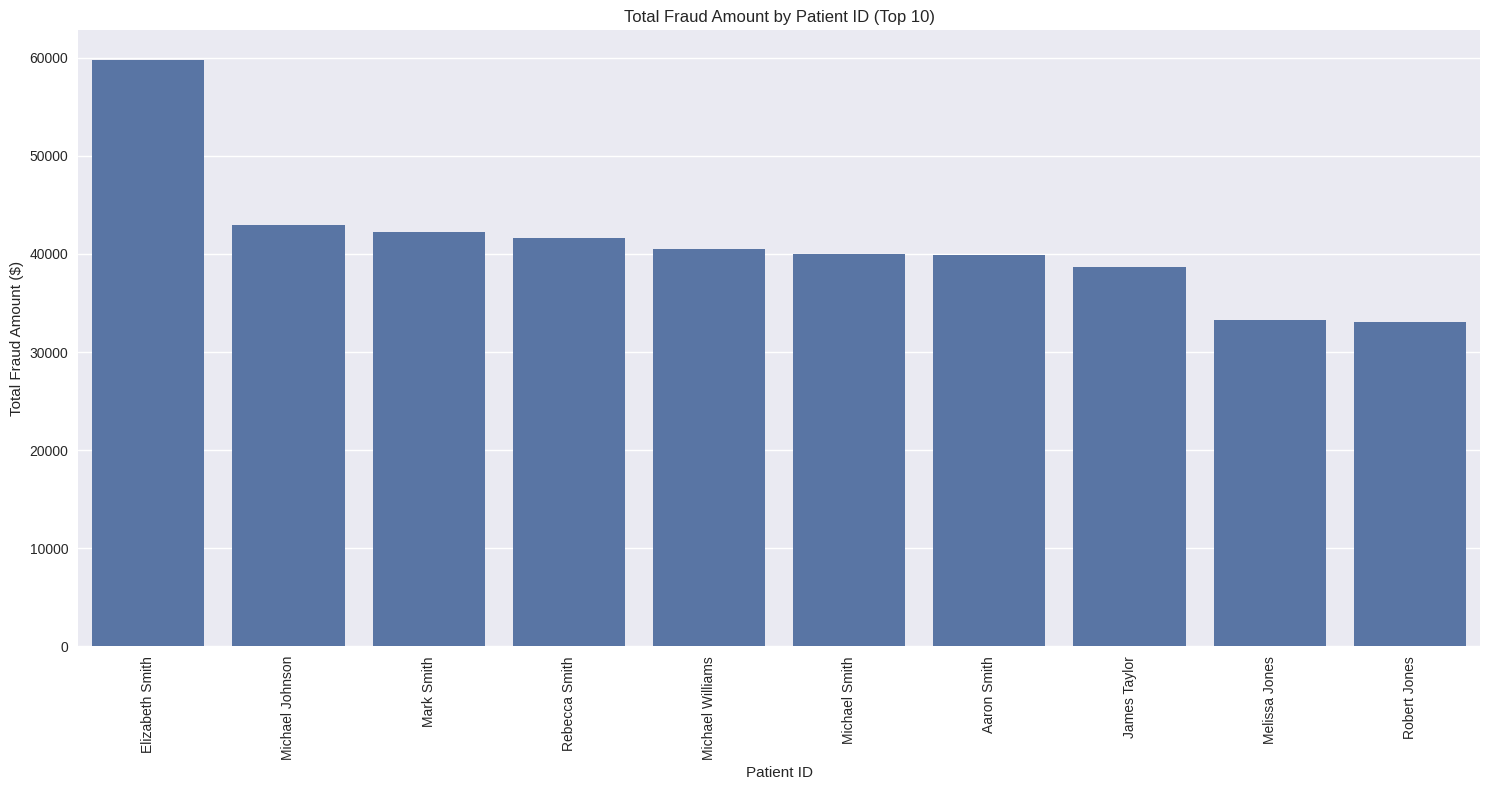

In [79]:
# 2. Bar plot of Total Fraud Amount by Patient ID (top 10)
plt.figure(figsize=(15, 8))
sns.barplot(x='Patient_ID', y='Total_Fraud_Amount', data=fraud_summary.head(10))
plt.title('Total Fraud Amount by Patient ID (Top 10)')
plt.xlabel('Patient ID')
plt.ylabel('Total Fraud Amount ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [83]:
# Sort the dataframe by 'Total_Fraud_Amount' and select the top 20 rows
top_fraud_summary = fraud_summary.sort_values(by='Total_Fraud_Amount', ascending=False).head(20)

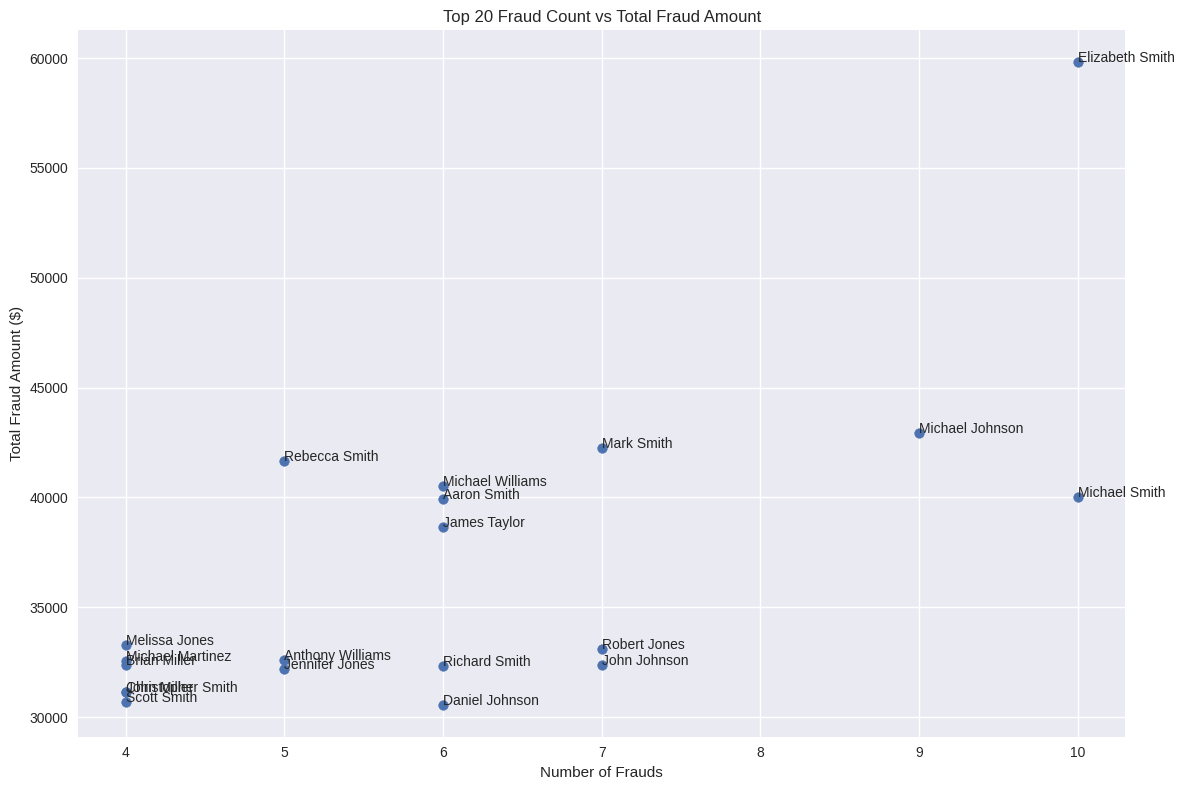

In [84]:
# Create a scatter plot for the top 20 patients
plt.figure(figsize=(12, 8))
plt.scatter(top_fraud_summary['Fraud_Count'], top_fraud_summary['Total_Fraud_Amount'])
plt.title('Top 20 Fraud Count vs Total Fraud Amount')
plt.xlabel('Number of Frauds')
plt.ylabel('Total Fraud Amount ($)')

# Annotate each point with the Patient_ID
for i, txt in enumerate(top_fraud_summary['Patient_ID']):
    plt.annotate(txt, (top_fraud_summary['Fraud_Count'].iloc[i], top_fraud_summary['Total_Fraud_Amount'].iloc[i]))

plt.tight_layout()
plt.show()

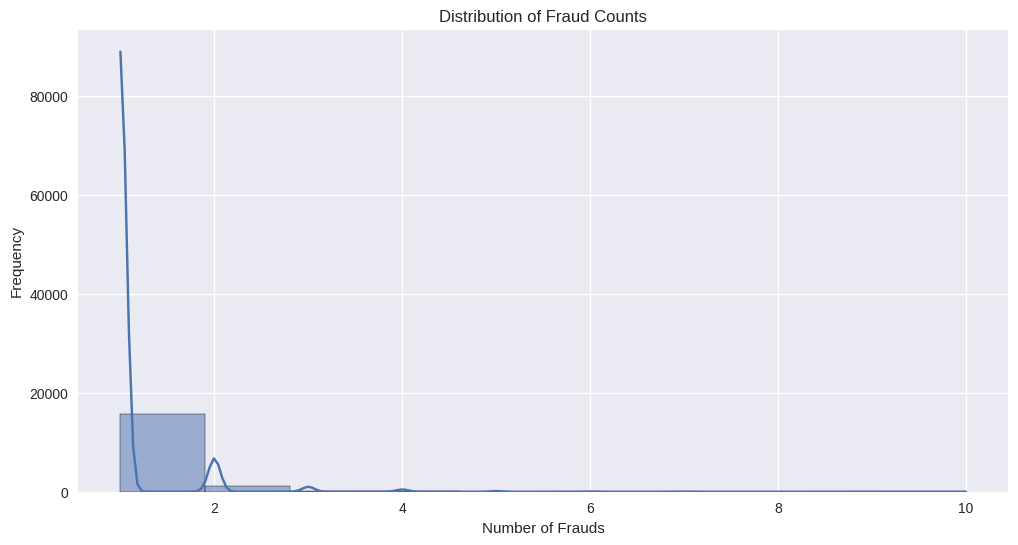

In [91]:
# 4. Histogram of Fraud Counts
plt.figure(figsize=(12, 6))
sns.histplot(fraud_summary['Fraud_Count'], kde=True, bins=10)
plt.title('Distribution of Fraud Counts')
plt.xlabel('Number of Frauds')
plt.ylabel('Frequency')
plt.show()

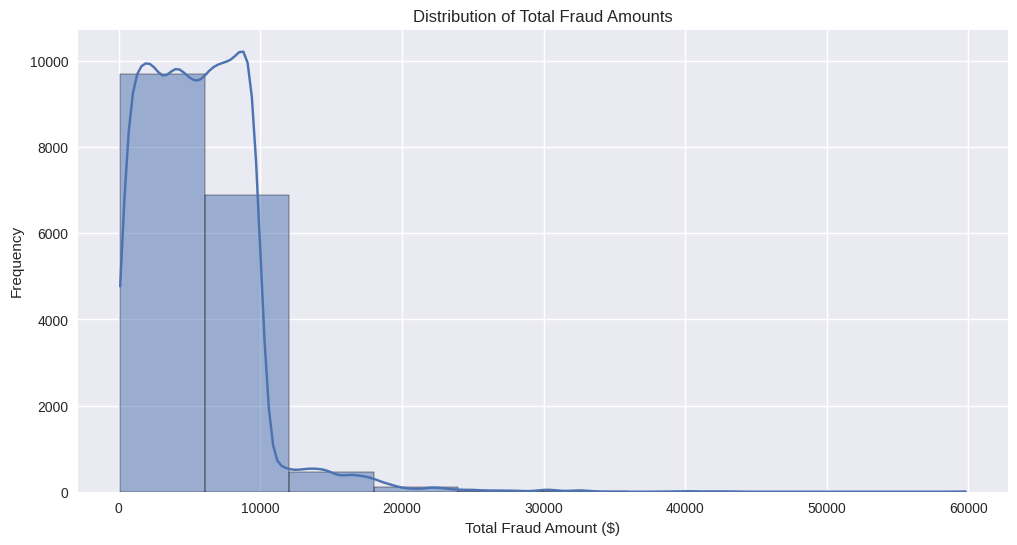

In [90]:
# 5. Histogram of Total Fraud Amounts
plt.figure(figsize=(12, 6))
sns.histplot(fraud_summary['Total_Fraud_Amount'], kde=True, bins=10)
plt.title('Distribution of Total Fraud Amounts')
plt.xlabel('Total Fraud Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Group by Country and calculate the count of frauds and total fraudulent amount
fraud_by_country = fraud_df.groupby('Country').agg({
    'Fraud_Label': 'count',
    'Total_Charges': 'sum'
}).reset_index()


In [51]:
# Rename columns for clarity
fraud_by_country.columns = ['Country', 'Fraud_Count', 'Total_Fraud_Amount']

# Sort by Fraud_Count in descending order
fraud_by_country = fraud_by_country.sort_values('Fraud_Count', ascending=False)

In [52]:
# Display the summary
print("Summary of Frauds by Country:")
print(fraud_by_country.to_string(index=False))

Summary of Frauds by Country:
Country  Fraud_Count  Total_Fraud_Amount
  Tokyo         3916         19547896.66
Beijing         3838         19573871.40
 Mumbai         3828         19454966.49
Bangkok         3810         18837372.42
  Seoul         3801         19073347.05


In [53]:
# Calculate and display overall statistics
total_frauds = fraud_by_country['Fraud_Count'].sum()
total_fraud_amount = fraud_by_country['Total_Fraud_Amount'].sum()
print(f"\nTotal number of frauds: {total_frauds}")
print(f"Total fraud amount: ${total_fraud_amount:,.2f}")


Total number of frauds: 19193
Total fraud amount: $96,487,454.02


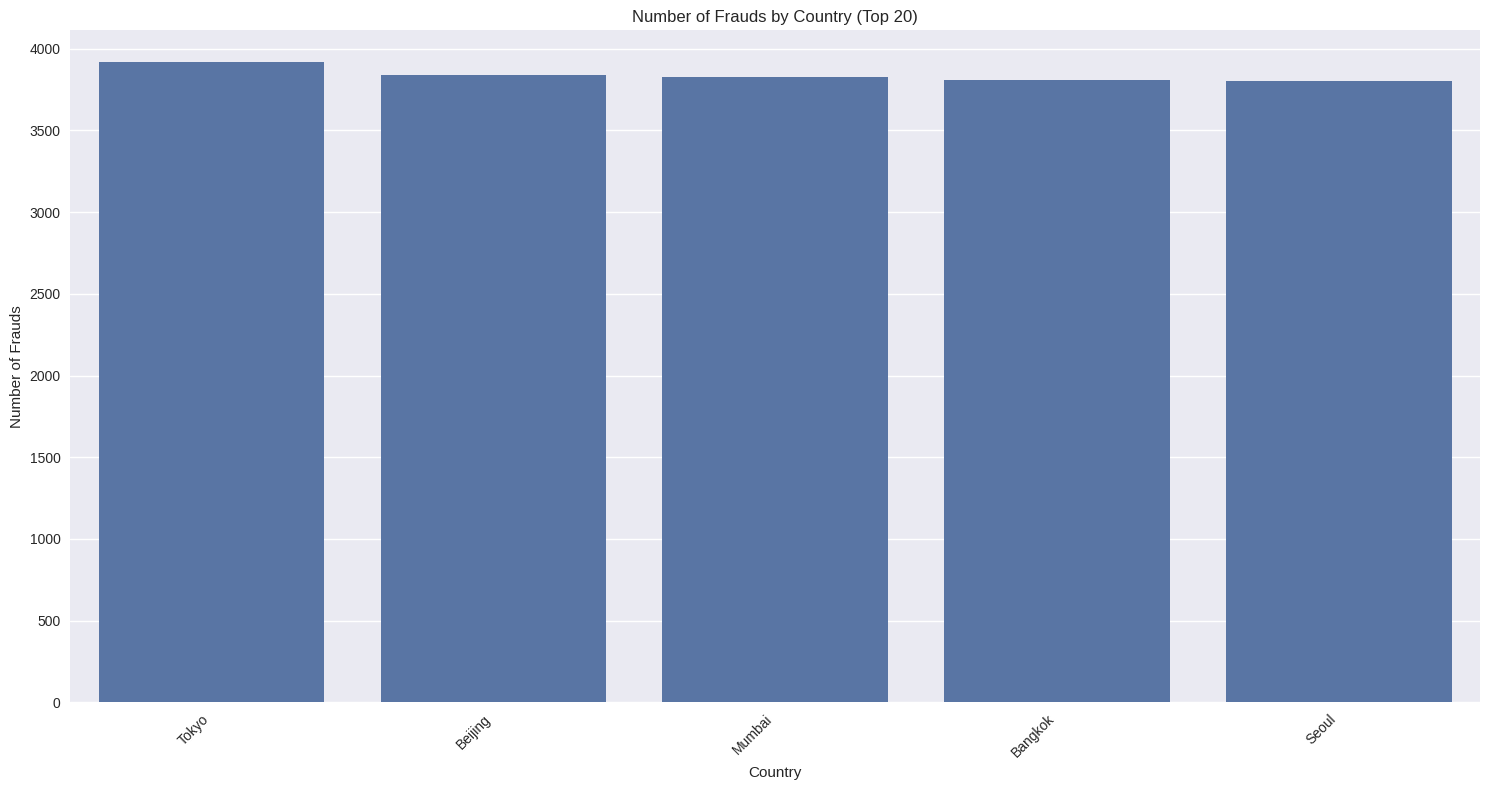

In [92]:
# Visualizations

# 1. Bar plot of Fraud Count by Country (top 10)
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Fraud_Count', data=fraud_by_country.head(10))
plt.title('Number of Frauds by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Frauds')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


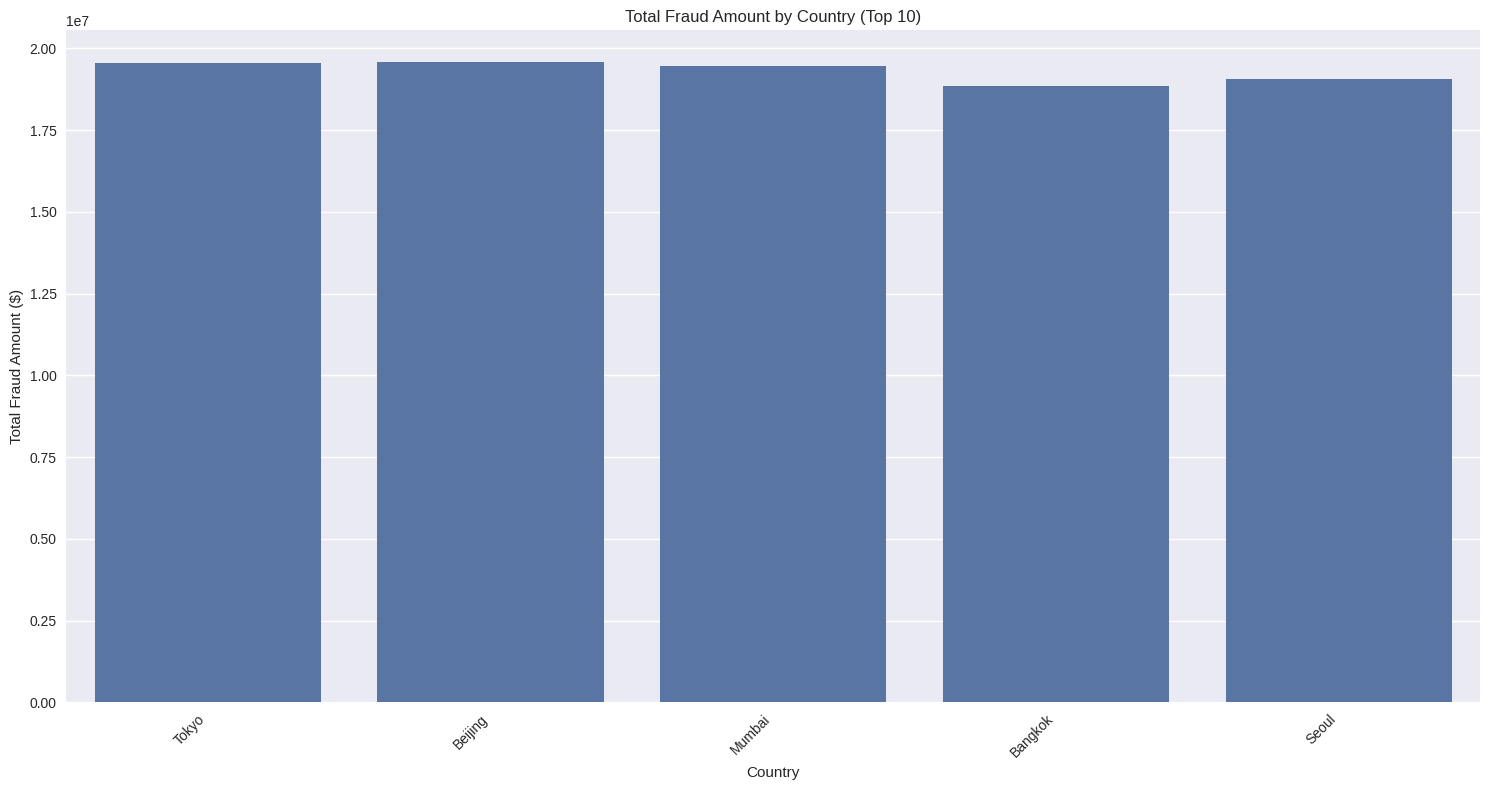

In [93]:
# 2. Bar plot of Total Fraud Amount by Country (top 10)
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Total_Fraud_Amount', data=fraud_by_country.head(10))
plt.title('Total Fraud Amount by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Fraud Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


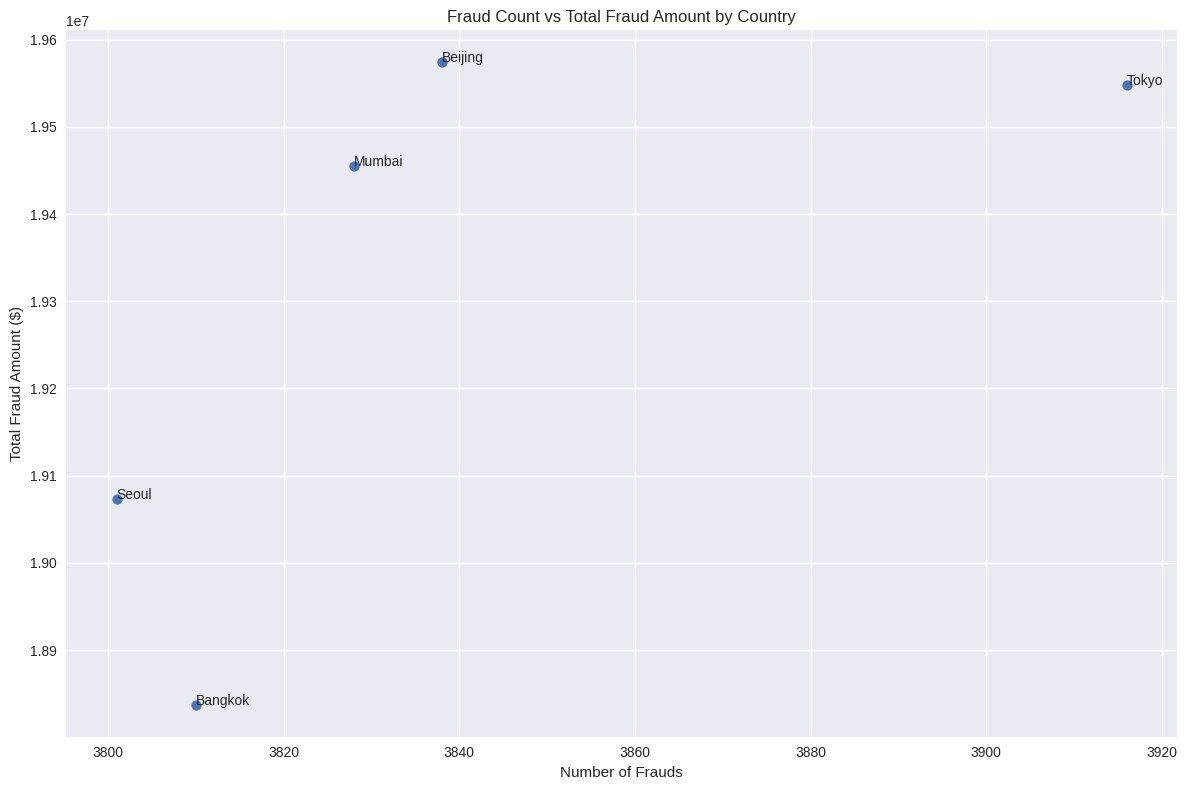

In [57]:
# 3. Scatter plot of Fraud Count vs Total Fraud Amount
plt.figure(figsize=(12, 8))
plt.scatter(fraud_by_country['Fraud_Count'], fraud_by_country['Total_Fraud_Amount'])
plt.title('Fraud Count vs Total Fraud Amount by Country')
plt.xlabel('Number of Frauds')
plt.ylabel('Total Fraud Amount ($)')
for i, txt in enumerate(fraud_by_country['Country']):
    plt.annotate(txt, (fraud_by_country['Fraud_Count'].iloc[i], fraud_by_country['Total_Fraud_Amount'].iloc[i]))
plt.tight_layout()
plt.show()

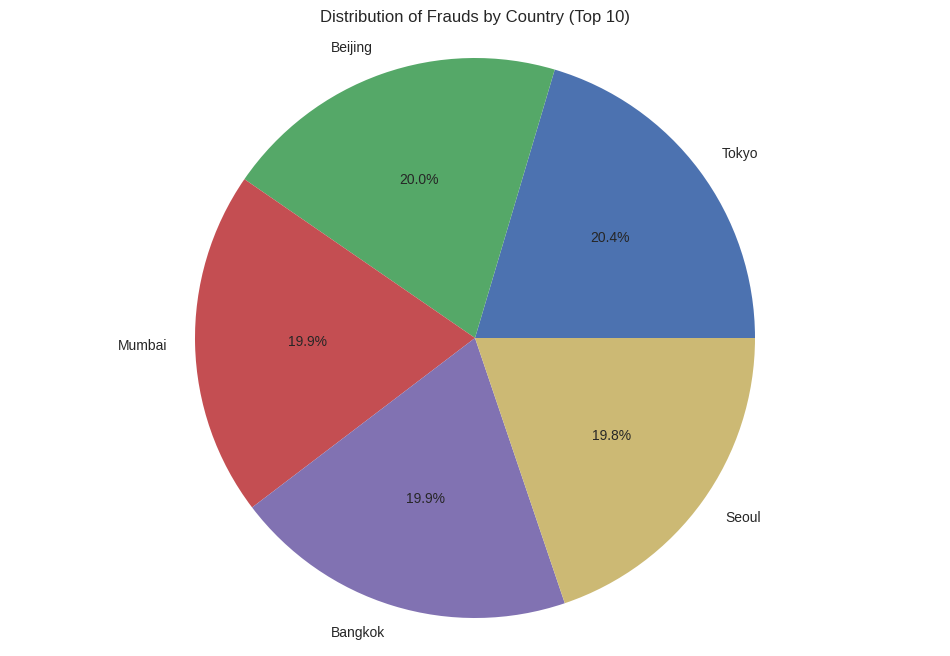

In [94]:
# 4. Pie chart of Fraud Count by Country (top 50)
plt.figure(figsize=(12, 8))
plt.pie(fraud_by_country['Fraud_Count'].head(10), labels=fraud_by_country['Country'].head(5), autopct='%1.1f%%')
plt.title('Distribution of Frauds by Country (Top 50)')
plt.axis('equal')
plt.show()

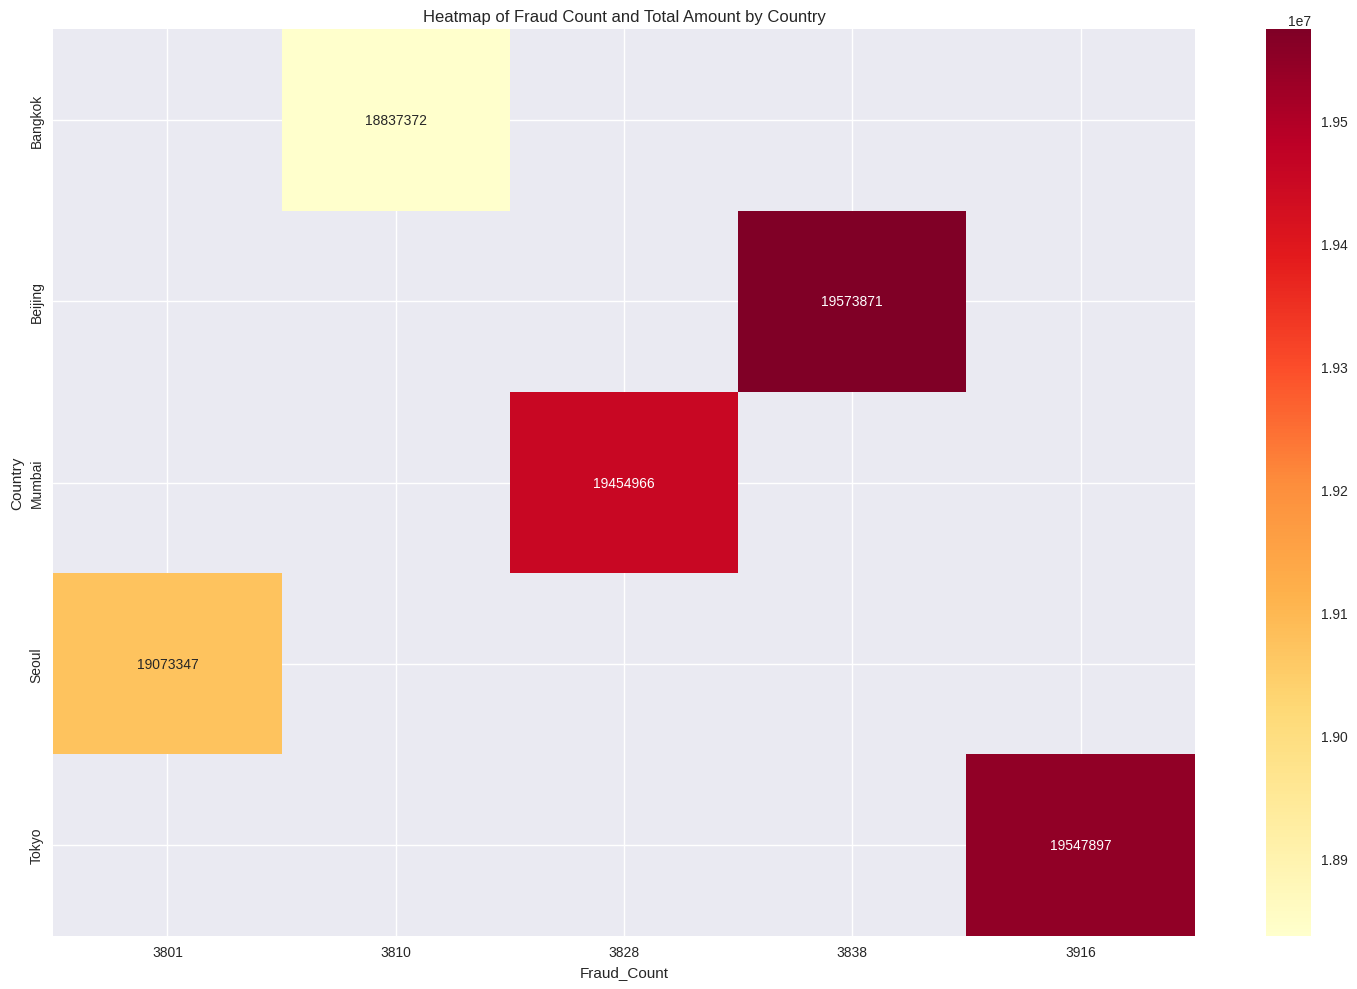

In [59]:
# 5. Heatmap of Fraud Count (if you have geographical data)
# This requires additional geographical data and libraries like geopandas
# Here's a simple heatmap without geographical boundaries
plt.figure(figsize=(15, 10))
fraud_pivot = fraud_by_country.pivot(index='Country', columns='Fraud_Count', values='Total_Fraud_Amount')
sns.heatmap(fraud_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Heatmap of Fraud Count and Total Amount by Country')
plt.tight_layout()
plt.show()


In [62]:
# Create a summary of investigation status
investigation_summary = df['Investigation_Details'].value_counts().reset_index()
investigation_summary.columns = ['Status', 'Count']

In [63]:
# Calculate percentages
investigation_summary['Percentage'] = investigation_summary['Count'] / investigation_summary['Count'].sum() * 100

In [64]:
# Display the summary
print("Summary of Investigation Status:")
print(investigation_summary.to_string(index=False))

Summary of Investigation Status:
             Status  Count  Percentage
            Cleared  12876   33.595992
         Suspicious  12735   33.228096
Under investigation  12715   33.175912


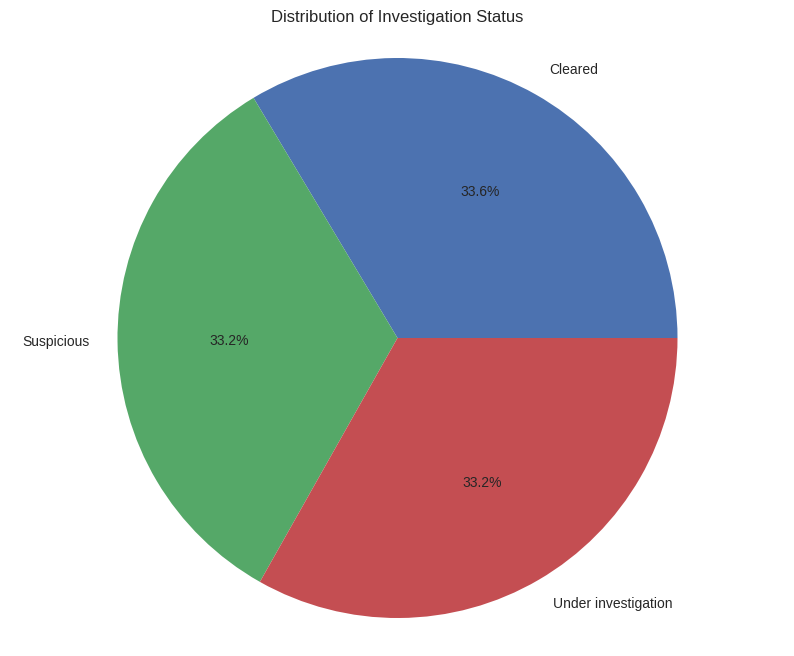

In [65]:
# Visualizations

# 1. Pie chart of Investigation Status
plt.figure(figsize=(10, 8))
plt.pie(investigation_summary['Count'], labels=investigation_summary['Status'], autopct='%1.1f%%')
plt.title('Distribution of Investigation Status')
plt.axis('equal')
plt.show()

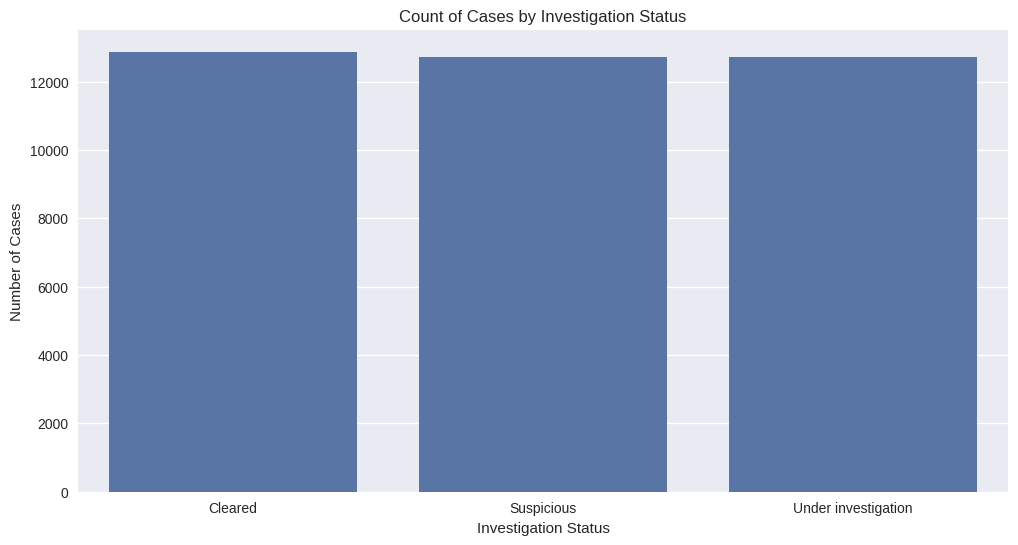

In [66]:
# 2. Bar plot of Investigation Status
plt.figure(figsize=(12, 6))
sns.barplot(x='Status', y='Count', data=investigation_summary)
plt.title('Count of Cases by Investigation Status')
plt.xlabel('Investigation Status')
plt.ylabel('Number of Cases')
plt.show()


In [68]:
# 3. Stacked bar plot of Investigation Status vs Fraud Label
fraud_investigation = pd.crosstab(df['Investigation_Details'], df['Fraud_Label'])
fraud_investigation_pct = fraud_investigation.div(fraud_investigation.sum(1), axis=0)

<Figure size 1200x600 with 0 Axes>

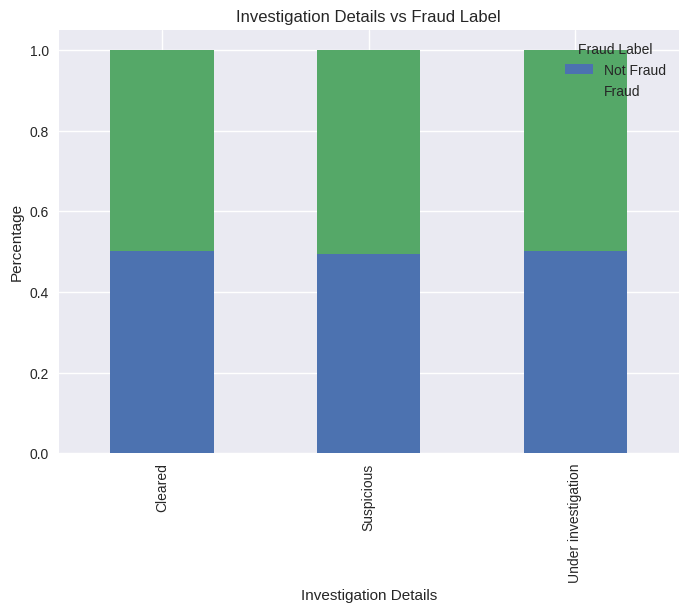

In [69]:
plt.figure(figsize=(12, 6))
fraud_investigation_pct.plot(kind='bar', stacked=True)
plt.title('Investigation Details vs Fraud Label')
plt.xlabel('Investigation Details')
plt.ylabel('Percentage')
plt.legend(title='Fraud Label', labels=['Not Fraud', 'Fraud'])
plt.show()

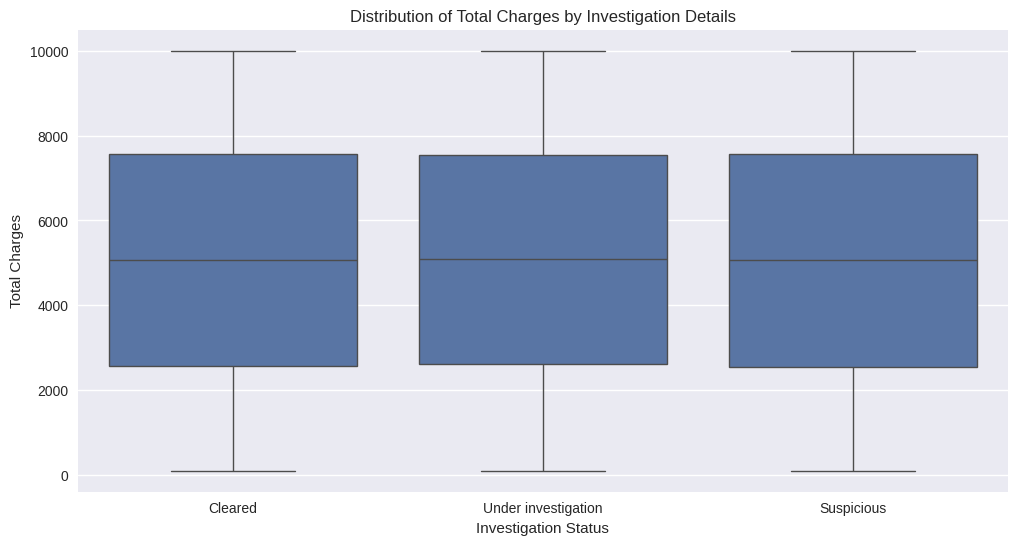

In [71]:
# 4. Box plot of Total Charges by Investigation Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Investigation_Details', y='Total_Charges', data=df)
plt.title('Distribution of Total Charges by Investigation Details')
plt.xlabel('Investigation Status')
plt.ylabel('Total Charges')
plt.show()


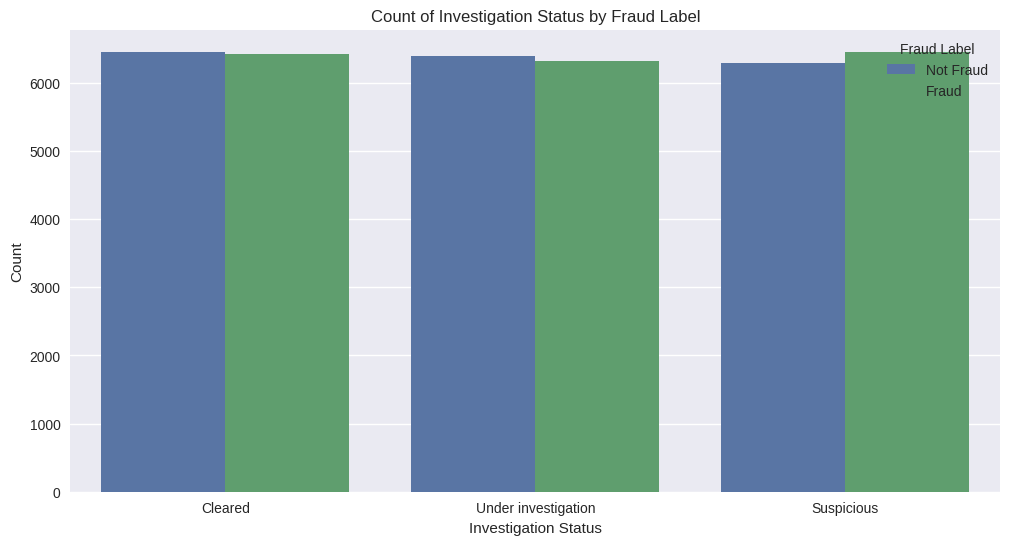

In [75]:
# 6. Count plot of Investigation Status by Fraud Label
plt.figure(figsize=(12, 6))
sns.countplot(x='Investigation_Details', hue='Fraud_Label', data=df)
plt.title('Count of Investigation Status by Fraud Label')
plt.xlabel('Investigation Status')
plt.ylabel('Count')
plt.legend(title='Fraud Label', labels=['Not Fraud', 'Fraud'])
plt.show()